### Создаю новый репозиторий

echo "# ml_sber" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/mikelvov/ml_sber.git
git push -u origin main

## Читаем данные и проверяем на пропуски

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('D:/User/Desktop/ml_sberhousing/data/train.csv')

In [3]:
data.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [5]:
# Missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data)

Your selected dataframe has 292 columns.
There are 51 columns that have missing values.


,Missing Values,% of Total Values
hospital_beds_raion,14441,47.4
build_year,13605,44.6
state,13559,44.5
cafe_sum_500_max_price_avg,13281,43.6
cafe_sum_500_min_price_avg,13281,43.6
cafe_avg_price_500,13281,43.6
max_floor,9572,31.4
material,9572,31.4
num_room,9572,31.4
kitch_sq,9572,31.4


#### Значения пропущены в большинстве там, что не буду использовать

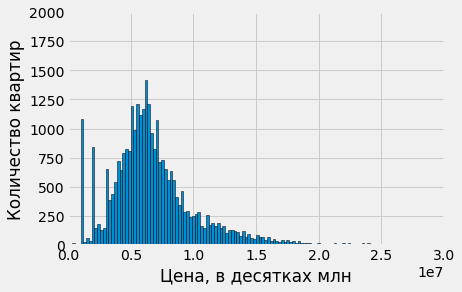

In [7]:
plt.style.use('fivethirtyeight')
plt.hist(data['price_doc'],bins = 500, edgecolor = 'k');
plt.axis([0, 3e+7, 0, 2000])
plt.xlabel('Цена, в десятках млн'); plt.ylabel('Количество квартир'); 
#plt.title('Energy Star Score Distribution');

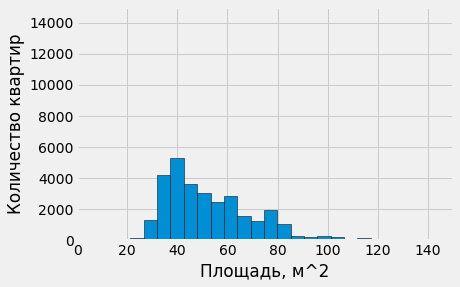

In [8]:
plt.style.use('fivethirtyeight')
plt.hist(data['full_sq'],bins = 1000, edgecolor = 'k');
plt.axis([0, 150, 0, 15000])
plt.xlabel('Площадь, м^2'); plt.ylabel('Количество квартир'); 

## Выбираю наиболее влияющие на цену столбцы по корреляции и сам добавляю другие

In [9]:
correl = data.corr()['price_doc'].sort_values()

In [10]:
correl[-15:]

cafe_count_5000               0.231546
cafe_count_5000_price_1500    0.232612
cafe_count_5000_price_1000    0.240464
trc_count_3000                0.242068
sport_objects_raion           0.252794
sport_count_1500              0.258376
trc_sqm_5000                  0.268072
office_sqm_5000               0.269977
sport_count_2000              0.278056
trc_count_5000                0.289371
sport_count_3000              0.290651
sport_count_5000              0.294864
full_sq                       0.341840
num_room                      0.476337
price_doc                     1.000000
Name: price_doc, dtype: float64

In [11]:
correl[:15]

zd_vokzaly_avto_km       -0.284069
sadovoe_km               -0.283622
kremlin_km               -0.279249
bulvar_ring_km           -0.279158
ttk_km                   -0.272620
nuclear_reactor_km       -0.257946
stadium_km               -0.236924
basketball_km            -0.223462
office_km                -0.223429
detention_facility_km    -0.223061
university_km            -0.218552
theater_km               -0.216025
swim_pool_km             -0.211798
catering_km              -0.210793
thermal_power_plant_km   -0.210417
Name: price_doc, dtype: float64

#### Беру 15 отрицательно коррелирующих и сам добавляю из положительных и тех, которые сам решил

In [12]:
index0= np.array(['price_doc','num_room','full_sq','sport_count_5000','trc_count_5000','floor','material','build_year','sub_area'])
index = [*index0,*correl[:15].index] 
index

['price_doc',
 'num_room',
 'full_sq',
 'sport_count_5000',
 'trc_count_5000',
 'floor',
 'material',
 'build_year',
 'sub_area',
 'zd_vokzaly_avto_km',
 'sadovoe_km',
 'kremlin_km',
 'bulvar_ring_km',
 'ttk_km',
 'nuclear_reactor_km',
 'stadium_km',
 'basketball_km',
 'office_km',
 'detention_facility_km',
 'university_km',
 'theater_km',
 'swim_pool_km',
 'catering_km',
 'thermal_power_plant_km']

## Создаю новый датасет с выбранными признаками

In [13]:
data1 = pd.DataFrame(data=data, columns=index, index=data.index)

In [14]:
data1.head()

,price_doc,num_room,full_sq,sport_count_5000,trc_count_5000,floor,material,build_year,sub_area,zd_vokzaly_avto_km,...,nuclear_reactor_km,stadium_km,basketball_km,office_km,detention_facility_km,university_km,theater_km,swim_pool_km,catering_km,thermal_power_plant_km
0,5850000,NaN,43,52,52,4.0,NaN,NaN,Bibirevo,14.231961,...,5.718519,8.148591,3.516513,0.637189,4.248036,6.715026,14.053047,3.065047,0.516838,5.814135
1,6000000,NaN,34,66,40,3.0,NaN,NaN,Nagatinskij Zaton,9.242586,...,3.489954,6.127073,1.161579,0.688796,12.649879,1.852560,6.829889,2.000154,0.230287,3.419574
2,5700000,NaN,43,67,35,2.0,NaN,NaN,Tekstil'shhiki,9.540544,...,7.506612,0.767569,1.952771,1.543049,7.682303,0.841254,4.273200,1.239304,0.190462,3.682455
3,13100000,NaN,89,26,22,9.0,NaN,NaN,Mitino,17.478380,...,9.522538,7.385521,4.923843,0.934273,8.789894,10.903161,16.990677,1.950317,0.465820,11.178333
4,16331452,NaN,77,195,114,4.0,NaN,NaN,Basmannoe,1.595898,...,8.671016,3.610754,0.307915,0.077901,3.779781,0.991683,1.112486,2.544696,0.026102,4.587917


## Проверяю на пропуски и исправляю их

In [15]:
missing_values_table(data1)

Your selected dataframe has 24 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
build_year,13605,44.6
num_room,9572,31.4
material,9572,31.4
floor,167,0.5


### Исправим экстремальные значения в build_year, так как встречается два вместе одной строкой

In [16]:
data1['build_year'].describe()

count    1.686600e+04
mean     3.068057e+03
std      1.543878e+05
min      0.000000e+00
25%      1.967000e+03
50%      1.979000e+03
75%      2.005000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [17]:
# Calculate first and third quartile
first_quartile = data1['build_year'].describe()['25%']
third_quartile = data1['build_year'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data1 = data1[(data1['build_year'] > (first_quartile - 3 * iqr)) &
              (data1['build_year'] < (third_quartile + 3 * iqr))]

In [18]:
data1['build_year'].describe()

count    15960.000000
mean      1985.370050
std         20.867012
min       1860.000000
25%       1968.000000
50%       1981.000000
75%       2006.000000
max       2018.000000
Name: build_year, dtype: float64

### Восстановим год по расстоянию до садового кольца

In [19]:
data1['weight_category'] = data1.sadovoe_km.apply(lambda w: int(w ))

In [20]:
data1.groupby(data1.weight_category).build_year.mean()

weight_category
0     1961.221344
1     1967.478528
2     1988.075330
3     1969.899110
4     1974.994220
5     1974.381818
6     1983.125725
7     1976.088889
8     1976.495040
9     1978.167176
10    1979.281874
11    1982.499270
12    1984.319149
13    1986.059583
14    1984.513716
15    1990.872093
16    1998.475728
17    2001.843023
18    2006.963810
19    2012.308036
20    2009.509804
21    2004.054054
22    2001.415929
23    2008.420168
24    2001.988095
25    2010.326389
26    2014.741117
27    2014.347368
28    2007.594595
29    2008.235294
30    1990.666667
31    1995.545455
32    1998.040000
33    1995.971698
34    1985.657895
35    1994.365639
36    1990.960784
37    1989.636364
38    1973.000000
39    1968.000000
47    1977.000000
48    1995.500000
49    2015.531915
50    2014.000000
53    2004.333333
54    1972.000000
57    1992.000000
58    2014.000000
66    2015.000000
68    2014.666667
Name: build_year, dtype: float64

In [21]:
data1['build_year_nona'] = data1.groupby(data1.weight_category).build_year.apply(lambda h: h.fillna(h.mean()))

In [22]:
data1.build_year = data1.build_year_nona

In [23]:
data1.drop('build_year_nona', axis=1, inplace=True)
data1.drop('weight_category', axis=1, inplace=True)

In [24]:
data1.build_year.isna().sum()

0

### num_room и material заполним, предварительно уберем экстремальные значения в full_sq , так как всевозможны площади до 200, а тут встречается 5326

In [25]:
data1['full_sq'].describe()

count    15960.000000
mean        53.229699
std         21.366808
min          1.000000
25%         38.000000
50%         48.000000
75%         63.000000
max        637.000000
Name: full_sq, dtype: float64

In [26]:
# Calculate first and third quartile
first_quartile = data1['full_sq'].describe()['25%']
third_quartile = data1['full_sq'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data1 = data1[(data1['full_sq'] > (first_quartile - 3 * iqr)) &
              (data1['full_sq'] < (third_quartile + 3 * iqr))]

### Заполним num_room по full_sq 

In [27]:
data1['full_sq'].describe()

count    15865.000000
mean        52.498645
std         18.656320
min          1.000000
25%         38.000000
50%         47.000000
75%         62.000000
max        137.000000
Name: full_sq, dtype: float64

In [28]:
data1['weight_category'] = data1.full_sq.apply(lambda w: int(w /10))

In [29]:
data1.groupby(data1.weight_category).num_room.mean()

weight_category
0     1.500000
1     1.096154
2     1.010239
3     1.111313
4     1.709153
5     2.194050
6     2.523697
7     2.869265
8     2.912141
9     3.263538
10    3.209945
11    3.342105
12    3.264706
13    3.028571
Name: num_room, dtype: float64

In [30]:
data1['room_nona'] = data1.groupby(data1.weight_category).num_room.apply(lambda h: h.fillna(h.mean()))

In [31]:
data1.num_room = data1.room_nona

In [32]:
data1.drop('room_nona', axis=1, inplace=True)
data1.drop('weight_category', axis=1, inplace=True)

In [33]:
data1.num_room.isna().sum()

0

### Заполним материал домов и этаж средним

In [34]:
data['material'].describe()

count    20899.000000
mean         1.827121
std          1.481154
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: material, dtype: float64

In [35]:
data1.material.fillna(data1.material.mean(), inplace=True)

In [36]:
data1.floor.fillna(data1.floor.mean(), inplace=True)

In [37]:
missing_values_table(data1)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Приведем категории к числу и нормализуем

In [38]:
data1 = pd.get_dummies(data1, columns=['sub_area'], drop_first=True)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
features = ['num_room','full_sq', 'build_year', 'sport_count_5000', 'trc_count_5000', 'floor', 'material',
            'zd_vokzaly_avto_km', 'sadovoe_km', 'kremlin_km', 'bulvar_ring_km', 'ttk_km', 'nuclear_reactor_km', 'stadium_km',
            'basketball_km', 'office_km', 'detention_facility_km', 'university_km', 'theater_km', 'swim_pool_km', 'catering_km',
            'thermal_power_plant_km']
data1[features] = scaler.fit_transform(data1[features])

In [41]:
data1.head()

,price_doc,num_room,full_sq,sport_count_5000,trc_count_5000,floor,material,build_year,zd_vokzaly_avto_km,sadovoe_km,...,sub_area_Vnukovo,sub_area_Vojkovskoe,sub_area_Vostochnoe,sub_area_Vostochnoe Degunino,sub_area_Vostochnoe Izmajlovo,sub_area_Vyhino-Zhulebino,sub_area_Zamoskvorech'e,sub_area_Zapadnoe Degunino,sub_area_Zjablikovo,sub_area_Zjuzino
8056,2750000,-1.097643,-2.224445,2.321105,2.211732,-1.012016,0.054980,-3.768980,-1.101552,-1.579062,...,0,0,0,0,0,0,0,0,0,0
8135,9000000,0.074077,0.026874,-0.341890,0.612295,0.570697,-0.605826,-0.254866,-0.170497,0.107532,...,0,0,0,0,0,0,0,0,0,0
8153,7011550,1.245798,1.313342,-1.129210,-1.352727,-1.012016,2.698207,1.381845,1.535524,1.459208,...,0,0,0,0,0,0,0,0,0,0
8154,7100000,0.074077,-0.401949,-0.967115,-0.438763,-0.220659,-0.605826,-0.736251,0.643289,0.805394,...,0,0,0,0,0,0,0,0,0,0
8175,6450000,-1.097643,-0.777168,0.792778,-0.027479,1.559892,-0.605826,-0.158589,-0.549894,-0.745800,...,0,0,0,0,0,0,0,0,0,0


## Train/Test

In [42]:
from sklearn.model_selection import train_test_split

X = data1.drop('price_doc', axis=1).to_numpy()
y = data1.price_doc.to_numpy()


print(X.shape)
print(y.shape)

(15865, 167)
(15865,)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
mean_squared_error(y_test, y_pred)

8306882922145.623

### Опрределим лучшие коэффициенты и сделаем SGDR Regression

In [47]:
from sklearn.linear_model import SGDRegressor

In [48]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty': ['l1', 'l2'], 'alpha': [0.01, 0.05, 0.1, 0.5, 1], 'max_iter': [1000, 5000, 10000]}
model1 = SGDRegressor()
gs_model = GridSearchCV(model1, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gs_model.fit(X_train, y_train)
gs_model.best_params_

{'alpha': 0.5, 'max_iter': 10000, 'penalty': 'l1'}

In [49]:
model = SGDRegressor(penalty='l1', alpha=0.01, max_iter=10000)

In [50]:
model.fit(X_train, y_train)

SGDRegressor(alpha=0.01, max_iter=10000, penalty='l1')

In [51]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

8471790170895.19

In [98]:
ls = np.arange(0,101)
y_tst_plot = np.empty(0, int)
y_train_plot = np.empty(0, int)
for i in ls:
    y_tst_plot = np.append(y_tst_plot, y_test[i])
    y_train_plot = np.append(y_train_plot, y_pred[i])

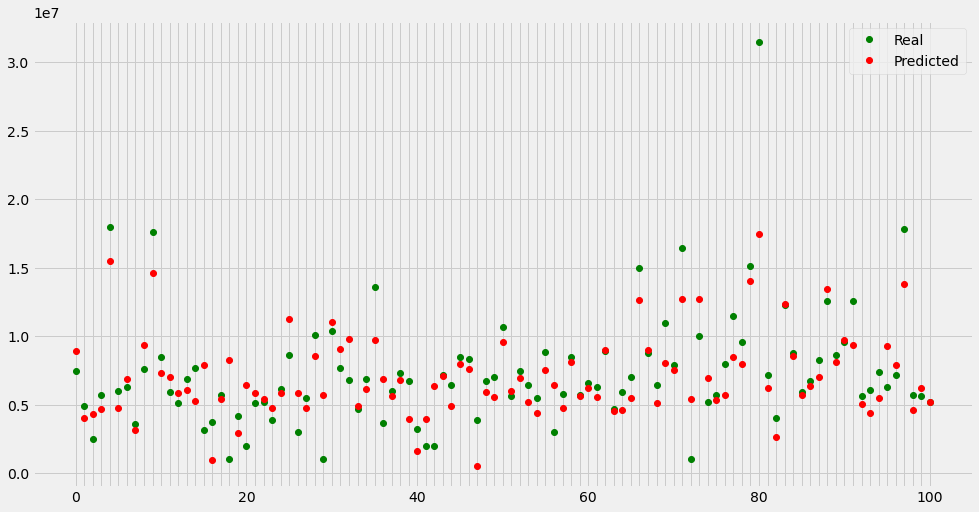

In [113]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(ls, y_tst_plot, 'go', label='Real')
plt.plot(ls, y_train_plot, 'ro', label='Predicted')
plt.legend()
ax.set_xticks(list(ls), minor=True)
ax.xaxis.grid(True, which='minor')
plt.show()

In [87]:
np.argsort(model.coef_)[-10:]

array([129,  44,  47, 128,   9, 163,  70,  78,   1,  50], dtype=int64)

#### Значимыми получились: 1 - num_room, 9 - sadovoe_km, остальные по индексу >24 - район 

### Сравним модель с простым предсказанием средней цены

In [82]:
y_pred_mean = np.full(len(y_test), data1.price_doc.mean())

In [84]:
mean_squared_error(y_test, y_pred_mean)

18445857166392.848

In [86]:
mean_squared_error(y_test, y_pred_mean) / mean_squared_error(y_test, y_pred)

2.170917475525736

#### Если предсказывать среднюю цену, то ошибка такого предсказания будет в 2 раза больше, чем на моей модели